In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import metrics

def lin(x, a, b):
    return a*x + b

height_file = open('gom_data.pickle', 'rb')
height_data = pickle.loads(height_file.read())


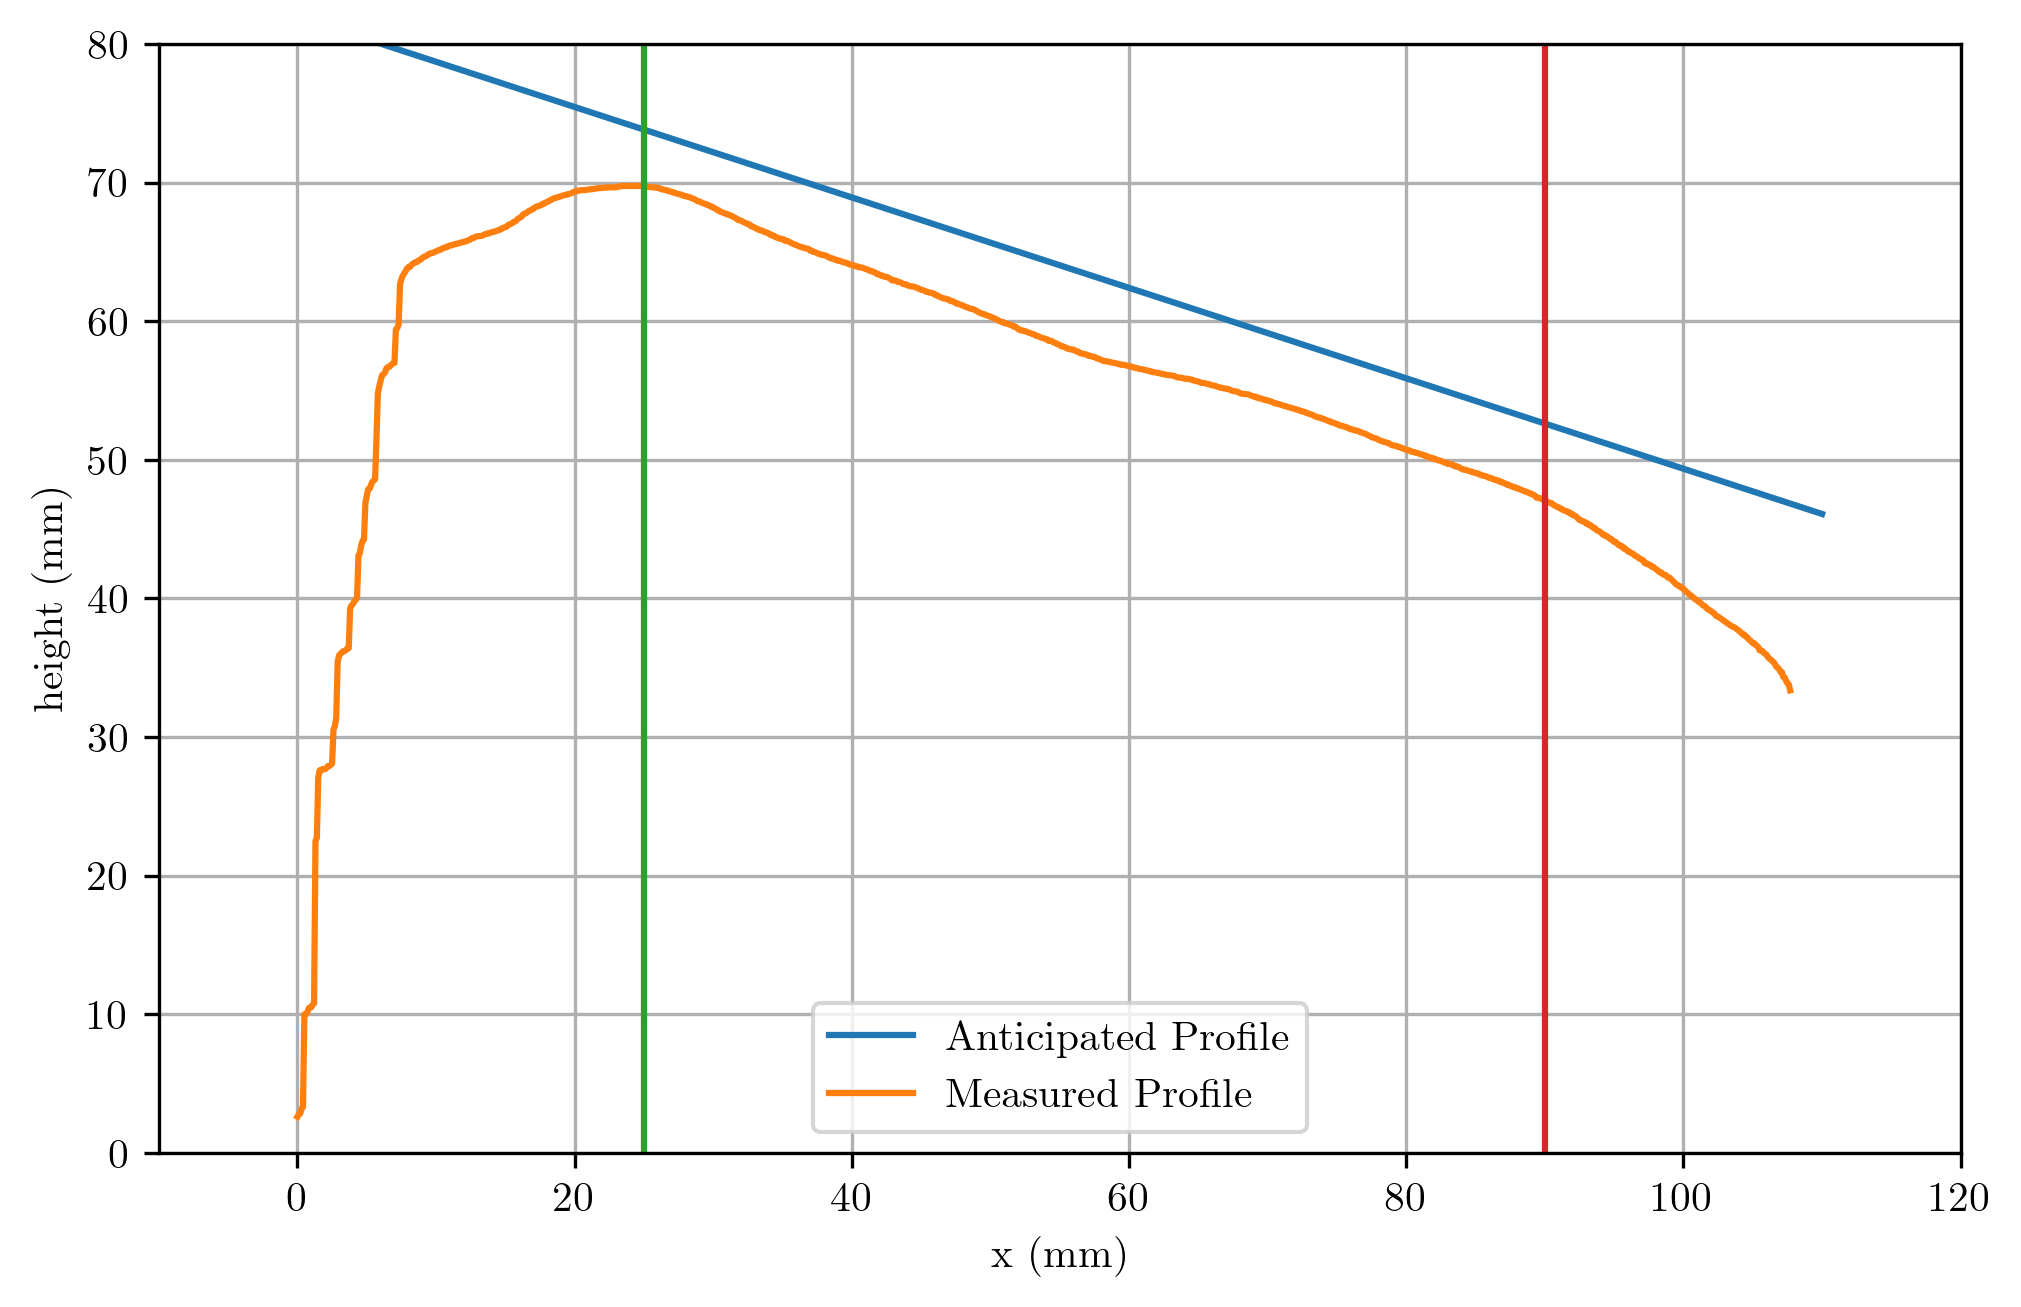

In [47]:
heights = np.array(height_data[0])
offset= 0
x_vals = np.linspace(0,110)

b_val = np.tan(np.radians(17.449021613147462))*251.2627106882681+3
slope = b_val/-251.2627106882681
x_offset = [x+offset for x in x_vals]
line = lin(x_vals, slope, b_val)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig,ax = plt.subplots(1,1)
fig.dpi=300
ax.plot(x_offset,line)
ax.plot(heights[:,0], heights[:,1])
ax.legend(["Anticipated Profile", "Measured Profile"])
ax.set_aspect('equal')
ax.set_ylim(0,80)
ax.set_xlim(-10,120)
ax.set_xlabel("x (mm)")
ax.set_ylabel("height (mm)")
ax.plot([25, 25],[0,80])
ax.plot([90,90], [0,80])
fig.set_figwidth(10)
ax.grid()
plt.show()

In [37]:
print(heights[250])
print(heights[900])

[25.         69.73744306]
[90.         47.08550043]


5.044702974393218


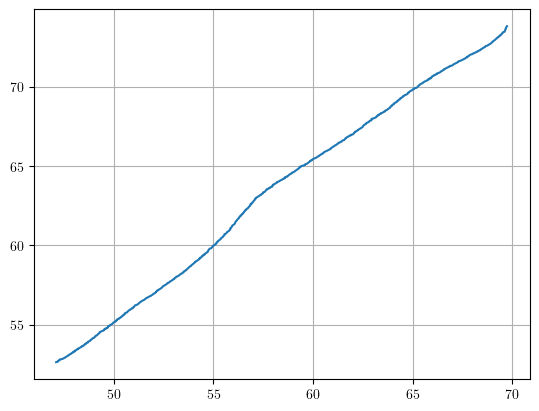

In [51]:
start_idx = 250
end_idx = 900
predic_height = lin(heights[start_idx:end_idx, 0], slope, b_val)

error=predic_height-heights[start_idx:end_idx,1]
rms = np.sqrt(np.sum(error**2)/len(error))
print(rms)

fig,ax = plt.subplots()
ax.plot(heights[start_idx:end_idx,1],predic_height)
ax.grid()
plt.show()